<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-и-подготовка-данных" data-toc-modified-id="Изучение-и-подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение и подготовка данных</a></span></li><li><span><a href="#Признаки-умножают-на-обратимую-матрицу.-Изменится-ли-качество-линейной-регрессии?" data-toc-modified-id="Признаки-умножают-на-обратимую-матрицу.-Изменится-ли-качество-линейной-регрессии?-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии?</a></span></li><li><span><a href="#Алгоритм-преобразования-данных" data-toc-modified-id="Алгоритм-преобразования-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования данных</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

## Изучение и подготовка данных

In [4]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [5]:
# # Код для считывания данных
df = pd.read_csv('df_insurance.csv')
df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
Пол                  5000 non-null int64
Возраст              5000 non-null float64
Зарплата             5000 non-null float64
Члены семьи          5000 non-null int64
Страховые выплаты    5000 non-null int64
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [8]:
# Поиск уникальных значений в столбце 'Страховые выплаты'
df['Страховые выплаты'].unique()

array([0, 1, 2, 3, 5, 4])

In [9]:
# Замена вещественного типа данных на целочисленный
df['Возраст'] = df['Возраст'].astype('int')
df['Зарплата'] = df['Зарплата'].astype('int')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
Пол                  5000 non-null int64
Возраст              5000 non-null int64
Зарплата             5000 non-null int64
Члены семьи          5000 non-null int64
Страховые выплаты    5000 non-null int64
dtypes: int64(5)
memory usage: 195.4 KB


0    0.8872
1    0.0846
2    0.0230
3    0.0036
4    0.0014
5    0.0002
Name: Страховые выплаты, dtype: float64


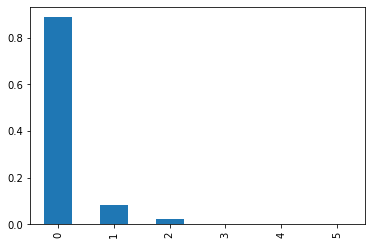

In [11]:
# Проверим, как часто в целевом признаке встречается разное количество выплат
class_frequency = df['Страховые выплаты'].value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar');

Так как в колонке возраст и зарплата все значения были целыми при вещественном типе данных, тип данных поменяли на целочисленный. Нашли уникальные значения в количестве страховых выплатах и посмотрели распределение по выплатам.

## Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии?

In [12]:
# Выделим переменные и целевой признаки
features=df.drop('Страховые выплаты', axis=1)
target=df['Страховые выплаты']
features.shape, target.shape

((5000, 4), (5000,))

In [13]:
# Сгенерируем случайную матрицу 4*4 и найдем обратную ей
np.random.seed(12345)
matrix = np.random.normal(20, size=(4, 4))
inverse_matrix = np.linalg.inv(matrix)
print('Случайная матрица: \n', matrix, '\n')
print('Обратная матрица: \n', inverse_matrix)

Случайная матрица: 
 [[19.79529234 20.47894334 19.48056128 19.4442697 ]
 [21.96578057 21.39340583 20.09290788 20.28174615]
 [20.76902257 21.24643474 21.00718936 18.70377889]
 [20.27499163 20.22891288 21.35291684 20.88642934]] 

Обратная матрица: 
 [[-0.88988712  0.72926531  0.06040012  0.06620187]
 [ 1.00083592 -0.4650729   0.05293891 -0.5275287 ]
 [-0.42902209 -0.23814125  0.35871112  0.30942045]
 [ 0.33311123 -0.01402434 -0.47662706  0.17820473]]


In [14]:
# Проверим качество модели линейной регрессии на первоначальных признаках с помощью MSE
model=LinearRegression()
model.fit(features, target)
predictions=model.predict(features)
print('MSE модели линейной регрессии на первоначальных признаках \n', mean_squared_error(target, predictions))

MSE модели линейной регрессии на первоначальных признаках 
 0.12334688937098948


In [15]:
# Проверим качество модели линейной регрессии на матрице признаков домноженной на обратимую матрицу с помощью R2
model_inv=LinearRegression()
features_inv = features.dot(inverse_matrix)
model_inv.fit(features_inv, target)
predictions=model_inv.predict(features_inv)
print('MSE модели линейной регрессии на первоначальных признаках, домноженных на обратную матрицу \n',
      mean_squared_error(target, predictions))

MSE модели линейной регрессии на первоначальных признаках, домноженных на обратную матрицу 
 0.12334688937097495


Посчитаные MSE до и после преобразования говорят о том, что качество моделей не изменилось!

Найдем предсказания модели линейной регрессии для первоначальных признаков и для признаков, домноженных на обратную матрицу и сравним их. Для этого вопспользуемся формулой: $$a = Xw$$ где $a$ - вектор предсказаний модели, $X$ - матрица признаков, $w$ - вектор весов.

Что бы найти вектор предсказаний, нужно вычислить вектор весов для каждого случая по формуле: $$w=(X^TX)^{-1}X^Ty$$ где $y$ - вектор значений целевого признака.

In [16]:
# Вектор весов для первоначальной матрицы признаков
w = np.linalg.inv(features.T.dot(features)).dot(features.T).dot(target)
# Вектор предсказания для матрицы признаков, домноженной на обратную матрицу
w_new = np.linalg.inv(features_inv.T.dot(features_inv)).dot(features_inv.T).dot(target)
print('Вектор весов w: \n', w)
print('Вектор весов w_new: \n', w_new)

Вектор весов w: 
 [-4.43854736e-02  2.33356252e-02 -1.17739062e-05 -4.55168115e-02]
Вектор весов w_new: 
 [-1.28645014 -1.3996196  -1.2780888  -1.37925535]


In [17]:
# Вектор предсказаний модели через вектор весов для первоначальной матрицы признаков
a = features.dot(w)
# Вектор предсказаний модели через вектор весов для преобразованной матрицы признаков
a_new = features_inv.dot(w_new)
print(a.values)
print(a_new.values)

[ 0.2828726   0.58051351  0.4294811  ... -0.02345654 -0.05255889
  0.08547463]
[ 0.28286721  0.58052547  0.42949023 ... -0.02345306 -0.05257808
  0.08546524]


Новый вектор предсказаний равен старому! Следовательно: $$Xw = X'w'$$ где $X$ и $X'$ - это признаки features и features_inv соответственно, $w$ и $w'$ - векторы весов w и w_new соответственно.
Подставляя в эту формулу обратимую матрицу (inverse_matrix), обозначим ее $M$, получим: $$Xw = XMw'$$
Домножим левую и правую часть на $X^{-1}$: $$X^{-1}Xw = X^{-1}XMw'$$
Получим: $$w = Mw'$$
Домножим левую и правую часть на $M^{-1}$: $$M^{-1}w = M^{-1}Mw'$$
Следовательно: $$w' = M^{-1}w$$

Проверим правильность вывода.

In [18]:
# matrix - это обратная матрица матрице inverse_matrix, которую мы использовали ранее для нахождения
# новой матрицы признаков
# новый вектор весов через первоначальный
matrix @ w

array([-1.286005  , -1.39913006, -1.27762778, -1.37879585])

In [19]:
# Новый векторв весов, посчитанный ранее
w_new

array([-1.28645014, -1.3996196 , -1.2780888 , -1.37925535])

Векторы равны, следовательно вектор весов линейной регрессии в исходной задаче и в преобразованной связаны соотношением $w' = M^{-1}w$

## Алгоритм преобразования данных

Для преобразования данных предлагаю:
- Извлечь и исходных данных матрицу признаков и вектор целевых признаков;
- Сгенерировать обратимую матрицу размерностью n*n (n - количество столбцов в признаках);
- Преобразовать данные путем перемножения матрицы признаков на обратимую матрицу.

Для обратного преобразования (декодировки) нужно перемножить преобразованные данные на обратную матрицу сгенерированной раннее обратимой матрицы.

In [20]:
# Создадим функцию для преобразования данных
def transform_data(data, target_name):
    # выделяем признаки из данных
    features = data.drop(target_name, axis=1).values
    # выделяем целевой признак
    target = data[target_name]
    # генерируем ключ преобразования
    np.random.seed(12345)
    m = np.random.normal(0, 20, size=(features.shape[1], features.shape[1]))
    try:
        inverse_m = np.linalg.inv(m)
    except:
        print('Матрица m необратима')
    # преобразуем данные
    features_new = features @ m
    # возвращаем преобразованные данные
    return features_new, target, m

In [27]:
# Создадим функцию для обратного преобразования
def retransform_data(transform_features, m):
    return transform_features @ np.linalg.inv(m)

## Проверка алгоритма

In [28]:
# Получим преобразованные данные
features_new, target, m = transform_data(df, 'Страховые выплаты')

In [29]:
# Проверим  функцию обратного преобразования
retransform_data(features_new, m)

array([[ 1.00000000e+00,  4.10000000e+01,  4.96000000e+04,
         1.00000000e+00],
       [-3.63797881e-12,  4.60000000e+01,  3.80000000e+04,
         1.00000000e+00],
       [ 3.63797881e-12,  2.90000000e+01,  2.10000000e+04,
         3.63797881e-12],
       ...,
       [ 3.63797881e-12,  2.00000000e+01,  3.39000000e+04,
         2.00000000e+00],
       [ 1.00000000e+00,  2.20000000e+01,  3.27000000e+04,
         3.00000000e+00],
       [ 1.00000000e+00,  2.80000000e+01,  4.06000000e+04,
         1.00000000e+00]])

In [ ]:
# Сравним с первоначальной матрицей признаков
features.values

Обратное преобразование работает корректно.

In [ ]:
# Проверим качество модели линейной регрессии на первоначальных признаках с помощью R2
model=LinearRegression()
model.fit(features, target)
predictions=model.predict(features)
print('R2 модели линейной регрессии на первоначальных признаках \n', r2_score(target, predictions))

In [ ]:
# Проверим качество модели линейной регрессии на преобразованных признаках с помощью R2
model_transform=LinearRegression()
model_transform.fit(features_new, target)
predictions=model_transform.predict(features_new)
print('R2 модели линейной регрессии на преобразованных признаках \n', r2_score(target, predictions))

Видим, что R2 двух моделей равны, это говорит о том, что алгоритм корректно работает.

## Выводы
- В ходе работы мы изучили и подготовили данные
- Нашли связь вектора весов модели линейной регрессии обученной на первоначальных и преобразованных признаках
- Разработали алгоритм преобразования данных, который позволяет скрыть персональную информацию клиентов, не ухудщая при этом качество предсказаний модели
- Создали функцию обратного преобразования данных.